# Flights Data Exploration
## by Noura Alzamil

## Preliminary Wrangling

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from January 2007 to December 2007. The data set contains 7,453,215 flights with 29 variables on each flight, but we will analyze the first month's data. The dataset has been extracted from Harvard Dataverse (https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/HG7NV7/2BHLWK&version=1.0) and comes originally from RITA. In the next sections, we will wrangle and explore the flights' data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the data from 2007.csv 
flights_df= pd.read_csv('2007.csv')

#load the data from carriers.csv file and airports.csv file
carriers_df= pd.read_csv('carriers.csv')
airports_df= pd.read_csv('airports.csv')

In [3]:
#select the first month in 2007 to be analyzed
flights_df=flights_df.loc[flights_df['Month']==1]
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [4]:
#get some information about the dataset
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621559 entries, 0 to 621558
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               621559 non-null  int64  
 1   Month              621559 non-null  int64  
 2   DayofMonth         621559 non-null  int64  
 3   DayOfWeek          621559 non-null  int64  
 4   DepTime            605782 non-null  float64
 5   CRSDepTime         621559 non-null  int64  
 6   ArrTime            604582 non-null  float64
 7   CRSArrTime         621559 non-null  int64  
 8   UniqueCarrier      621559 non-null  object 
 9   FlightNum          621559 non-null  int64  
 10  TailNum            621559 non-null  object 
 11  ActualElapsedTime  604582 non-null  float64
 12  CRSElapsedTime     621526 non-null  float64
 13  AirTime            604582 non-null  float64
 14  ArrDelay           604582 non-null  float64
 15  DepDelay           605782 non-null  float64
 16  Or

In [5]:
flights_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,621559.0,621559.0,621559.000000,621559.000000,605782.000000,621559.000000,604582.000000,621559.000000,621559.000000,604582.000000,...,621559.000000,621559.000000,621559.000000,621559.000000,621559.000000,621559.000000,621559.000000,621559.000000,621559.000000,621559.000000
mean,2007.0,1.0,15.941602,3.748624,1343.482436,1333.645047,1494.382391,1501.843928,2244.794930,126.284881,...,710.612408,6.550979,16.330902,0.025383,0.001931,3.539828,0.812674,3.594690,0.019506,4.673724
std,0.0,0.0,8.968138,1.989688,475.377222,462.580225,498.611077,477.388820,1971.193313,70.777898,...,556.350650,5.223874,11.773534,0.157285,0.043897,19.054914,9.111444,14.505903,0.921016,19.617784
min,2007.0,1.0,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,15.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.0,1.0,8.000000,2.000000,933.000000,930.000000,1117.000000,1120.000000,638.000000,76.000000,...,313.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.0,1.0,16.000000,4.000000,1335.000000,1325.000000,1521.000000,1522.000000,1589.000000,108.000000,...,554.000000,5.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2007.0,1.0,24.000000,5.000000,1732.000000,1720.000000,1915.000000,1910.000000,3568.000000,157.000000,...,944.000000,8.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2007.0,1.0,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9599.000000,1270.000000,...,4962.000000,224.000000,352.000000,1.000000,1.000000,1406.000000,941.000000,1209.000000,164.000000,899.000000


In [6]:
#have a look at carriers' dataset, which will be merged with the flights' dataset to get the carriers' full names   
carriers_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [7]:
#have a look at airports' dataset, which will be merged with the flights' dataset to get the airports' names   
airports_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


The above datasets should be cleaned and organized before starting to analyze and visualize the flights' data by performing the following operations:

- remove the duplicated rows
- drop the rows with canceled or diverted flights
- merge the flights' dataset with carriers' dataset
- merge the flights' dataset with airports' dataset
- drop unused columns(duplicated merged columns or unused columns)
- rename the merged columns(Description,iata_x, and iata_y)
- replace the values of DayOfWeek with the actual days(1:Monday, 2:Tuesday, ...etc)


In [8]:
#create a copy of the dataframe to clean it
flights_df_clean = flights_df.copy()

In [9]:
#check for rows duplication
flights_df_clean.duplicated().sum()

2

In [10]:
#remove the duplicated rows from the dataset
flights_df_clean.drop_duplicates(inplace=True)
flights_df_clean.reset_index(drop=True, inplace=True)

Dropping the rows with canceled or diverted flights won't affect the dataset since we won't consider the canceled and diverted flights in our analysis, and we will only deal with the delayed and on-time flights.

In [11]:
#drop the rows with canceled flights
flights_df_clean=flights_df_clean.drop(flights_df_clean[flights_df_clean['Cancelled']==1].index)

#drop the rows with diverted flights
flights_df_clean=flights_df_clean.drop(flights_df_clean[flights_df_clean['Diverted']==1].index)

#reset indexes
flights_df_clean.reset_index(drop=True, inplace=True)

In [12]:
#merge the carriers' dataframe with flights' dataframe
flights_df_clean = pd.merge(flights_df_clean, carriers_df, how='left',left_on='UniqueCarrier', right_on='Code')

#merge the airports' dataframe with flights' dataframe
flights_df_clean = pd.merge(flights_df_clean, airports_df[['iata','airport']], how='left',left_on='Origin', right_on='iata')
flights_df_clean = pd.merge(flights_df_clean, airports_df[['iata','airport']], how='left',left_on='Dest', right_on='iata')

flights_df_clean

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Code,Description,iata_x,airport_x,iata_y,airport_y
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,0,0,0,0,WN,Southwest Airlines Co.,SMF,Sacramento International,ONT,Ontario International
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,0,0,0,0,WN,Southwest Airlines Co.,SMF,Sacramento International,PDX,Portland Intl
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,0,0,0,31,WN,Southwest Airlines Co.,SMF,Sacramento International,PDX,Portland Intl
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,0,0,0,3,WN,Southwest Airlines Co.,SMF,Sacramento International,PDX,Portland Intl
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,0,0,0,0,WN,Southwest Airlines Co.,SMF,Sacramento International,PDX,Portland Intl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604575,2007,1,17,3,1402.0,1405,1555.0,1606,DL,1766,...,0,0,0,0,DL,Delta Air Lines Inc.,FLL,Fort Lauderdale-Hollywood Int'l,ATL,William B Hartsfield-Atlanta Intl
604576,2007,1,17,3,1707.0,1659,1927.0,1853,DL,1766,...,0,26,0,0,DL,Delta Air Lines Inc.,ATL,William B Hartsfield-Atlanta Intl,ONT,Ontario International
604577,2007,1,17,3,1211.0,1142,1310.0,1240,DL,1767,...,0,1,0,29,DL,Delta Air Lines Inc.,SLC,Salt Lake City Intl,LAX,Los Angeles International
604578,2007,1,17,3,1711.0,1716,1956.0,2035,DL,1769,...,0,0,0,0,DL,Delta Air Lines Inc.,PHL,Philadelphia Intl,SLC,Salt Lake City Intl


In [13]:
#drop unused columns (UniqueCarrier,Cancelled,CancellationCode,Diverted,Code,iata_x,iata_y,Origin, and Dest)
flights_df_clean.drop(['UniqueCarrier', 'Cancelled','CancellationCode','Diverted','Code','iata_x','iata_y','Origin','Dest'], axis = 1,inplace=True) 

In [14]:
#verify the change
flights_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604580 entries, 0 to 604579
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               604580 non-null  int64  
 1   Month              604580 non-null  int64  
 2   DayofMonth         604580 non-null  int64  
 3   DayOfWeek          604580 non-null  int64  
 4   DepTime            604580 non-null  float64
 5   CRSDepTime         604580 non-null  int64  
 6   ArrTime            604580 non-null  float64
 7   CRSArrTime         604580 non-null  int64  
 8   FlightNum          604580 non-null  int64  
 9   TailNum            604580 non-null  object 
 10  ActualElapsedTime  604580 non-null  float64
 11  CRSElapsedTime     604580 non-null  float64
 12  AirTime            604580 non-null  float64
 13  ArrDelay           604580 non-null  float64
 14  DepDelay           604580 non-null  float64
 15  Distance           604580 non-null  int64  
 16  Ta

In [15]:
#rename Description column,airport_x column, and airport_y column
flights_df_clean.rename({'Description': 'Airline', 'airport_x': 'DepartureAirport','airport_y':'ArrivalAirport'}, axis=1, inplace=True)

In [16]:
#verify the change
flights_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604580 entries, 0 to 604579
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               604580 non-null  int64  
 1   Month              604580 non-null  int64  
 2   DayofMonth         604580 non-null  int64  
 3   DayOfWeek          604580 non-null  int64  
 4   DepTime            604580 non-null  float64
 5   CRSDepTime         604580 non-null  int64  
 6   ArrTime            604580 non-null  float64
 7   CRSArrTime         604580 non-null  int64  
 8   FlightNum          604580 non-null  int64  
 9   TailNum            604580 non-null  object 
 10  ActualElapsedTime  604580 non-null  float64
 11  CRSElapsedTime     604580 non-null  float64
 12  AirTime            604580 non-null  float64
 13  ArrDelay           604580 non-null  float64
 14  DepDelay           604580 non-null  float64
 15  Distance           604580 non-null  int64  
 16  Ta

In [17]:
#replace the values of DayOfWeek with the actual days(1:Monday, 2:Tuesday, ...etc)
flights_df_clean['DayOfWeek'] = flights_df_clean['DayOfWeek'].map(
    {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})

In [18]:
#verify the change
flights_df_clean.DayOfWeek.value_counts()

Wednesday    100138
Monday        99878
Tuesday       99821
Thursday      81585
Friday        80986
Sunday        74973
Saturday      67199
Name: DayOfWeek, dtype: int64

In [19]:
#store the cleaned dataset
flights_df_clean.to_csv('flights_df_clean.csv', index=False)

### What is the structure of your dataset?

> The data has been extracted from three datasets, '2007.csv' dataset, 'carriers.csv' dataset, and 'airports.csv' dataset. All flights' information grabbed from the '2007.csv' dataset, and the other two datasets (carriers.csv and airports.csv) were merged with the flights' dataset to get the carriers' full names and airports' names.                                         
The final cleaned dataset consists of 604,580 flights with 26 variables on each flight. The dataset includes the following variables:                                                                                            
 1   Year                 
 2   Month               
 3   DayofMonth           
 4   DayOfWeek           
 5   DepTime -            Actual Departure Time (local time: hhmm)                                                     
 6   CRSDepTime -         CRS Departure Time (local time: hhmm)  
 7   ArrTime -           Actual Arrival Time (local time: hhmm)                                                     
 8   CRSArrTime -        CRS Arrival Time (local time: hhmm)                                                          
 9   FlightNum                                                                                                         
 10  TailNum                                                                                                         
 11  ActualElapsedTime - Elapsed Time of Flight, in Minutes                                                          
 12  CRSElapsedTime -    CRS Elapsed Time of Flight, in Minutes                                                      
 13  AirTime -           Flight Time, in Minutes                                                                     
 14  ArrDelay  -         Difference in minutes between scheduled and actual arrival time. Early arrivals show negative                         numbers.                                                                                     
 15  DepDelay  -         Difference in minutes between scheduled and actual departure time. Early departures show                               negative numbers.                                                                          
 16  Distance  -         Distance between airports (miles)                                                            
 17  TaxiIn  -           Taxi In Time, in Minutes  
 18  TaxiOut  -          Taxi Out Time, in Minutes  
 19  CarrierDelay -      Carrier Delay, in Minutes  
 20  WeatherDelay  -     Weather Delay, in Minutes  
 21  NASDelay -          National Air System Delay, in Minutes  
 22  SecurityDelay  -    Security Delay, in Minutes  
 23  LateAircraftDelay - Late Aircraft Delay, in Minutes                                                             
 24  Airline  -          Airline Full Name                                                                           
 25  DepartureAirport -  Departure Airport Name                                                                      
 26  ArrivalAirport  -   Arrival Airport Name                                                
 
> References:                                                                                                        
Transtats.bts.gov. 2021. About. [online] Available at: <https://www.transtats.bts.gov/Fields.asp> [Accessed 19 January 2021].                                                                                                               
Stat-computing.org. 2021. [online] Available at: <http://stat-computing.org/dataexpo/2009/supplemental-data.html> [Accessed 19 January 2021].



### What is/are the main feature(s) of interest in your dataset?

> I'm interested in analyzing the delayed flights in terms of flight carriers and airports, the most common delay causes, the average delay time, and the rate of delayed flights on each weekday.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following variables may have an effect on the analysis process, and it will support our investigation:          
    - DayOfWeek                                                                                                       
    - ArrDelay                                                                                                    
    - DepDelay                                                                                                
    - Airline                                                                        
    - DepartureAirport                                                                        
    - CarrierDelay                                                                                            
    - WeatherDelay,NASDelay,SecurityDelay,and LateAircraftDelay

## Univariate Exploration

> In this section, we will investigate distributions of some variables and take a deeper look on some of them.  

### Departure Delay


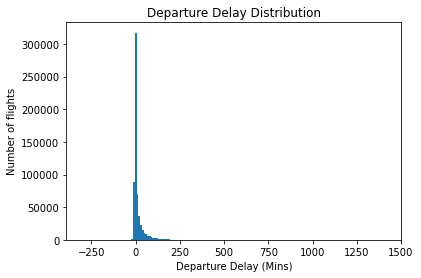

In [21]:
#plot a histogram to show the distributions of the DepDelay variable
bins = np.arange(flights_df_clean.DepDelay.min(), flights_df_clean.DepDelay.max()+10, 10)
plt.hist(data = flights_df_clean, x = 'DepDelay',bins = bins);
plt.title('Departure Delay Distribution');
plt.xlabel("Departure Delay (Mins)");
plt.ylabel("Number of flights");

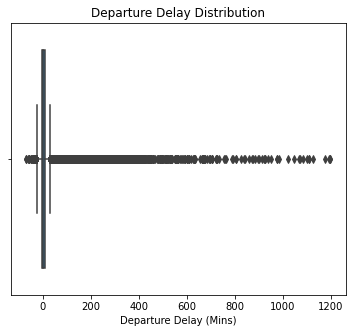

In [32]:
#plot a box plot to show the distributions and the outliers of the DepDelay variable
plt.figure(figsize = [6, 5])
base_color = sb.color_palette()[0]
plt.title('Departure Delay Distribution');

sb.boxplot(data=flights_df_clean, x='DepDelay', color=base_color).set(xlabel='Departure Delay');
plt.xlabel("Departure Delay (Mins)");


A flight is considered delayed when it departed 15 or more minutes than the schedule, and early departures show negative numbers in the dataset. The box plot above shows that there are some outliers to be investigated.

In [23]:
flights_df_clean.DepDelay.describe()

count    604580.000000
mean         10.253025
std          32.666583
min        -305.000000
25%          -4.000000
50%           0.000000
75%          10.000000
max        1406.000000
Name: DepDelay, dtype: float64

In [24]:
pd.set_option("display.max_columns", 50)
flights_df_clean[flights_df_clean.DepDelay < -100]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,DepartureAirport,ArrivalAirport
540490,2007,1,4,Thursday,1302.0,1807,1350.0,1902,139,N742AS,48.0,55.0,41.0,-312.0,-305.0,289,4,3,0,0,0,0,0,Alaska Airlines Inc.,King Salmon,Ted Stevens Anchorage International
542520,2007,1,29,Monday,1015.0,1200,1441.0,1442,580,N943AS,266.0,162.0,144.0,-1.0,-105.0,1050,2,120,0,0,0,0,0,Alaska Airlines Inc.,Seattle-Tacoma Intl,San Diego International-Lindbergh


In [25]:
pd.set_option("display.max_columns", 50)
flights_df_clean[flights_df_clean.DepDelay> 1250]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,DepartureAirport,ArrivalAirport
451531,2007,1,1,Monday,841.0,915,1002.0,1016,1719,N925US,141.0,121.0,106.0,1426.0,1406.0,622,10,25,1406,0,20,0,0,Northwest Airlines Inc.,Cleveland-Hopkins Intl,Minneapolis-St Paul Intl


After investigating the outliers, the results show that the two-sided outliers are wrong values since the difference between the actual departure time and the scheduled departure time isn't calculated or represented accurately in the departure delay variable(for example, the longest departure delay (1406) is a wrong value since the actual departure time is 841, and the scheduled departure time is 915, so the difference between them suppose to be -74).
Based on the previous findings, we have to drop the above row from the dataset.


In [26]:
#select and store the indexes in a list
indexes=flights_df_clean[(flights_df_clean['DepDelay'] < -100) | (flights_df_clean['DepDelay'] > 1250)].index.tolist()

#drop the rows
flights_df_clean=flights_df_clean.drop(flights_df_clean.index[indexes])

#reset indexes
flights_df_clean.reset_index(drop=True,inplace=True)

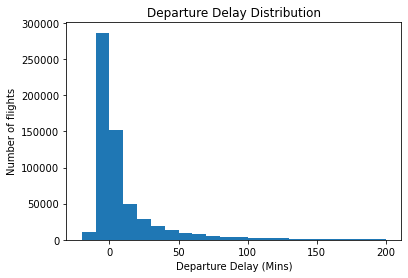

In [27]:
#plot a histogram again to show the distributions of the DepDelay in the limit of [-20<x<200]
bins = np.arange(-20, 210, 10)
plt.title('Departure Delay Distribution');
plt.xlabel("Departure Delay (Mins)");
plt.ylabel("Number of flights");
plt.hist(data=flights_df_clean, x='DepDelay',bins=bins);

As shown above in the histogram, the distribution of the departure delay variable is right-skewed, and most of the data are between -10 and 10, and that can be considered as a reasonable duration.

### Arrival Delay


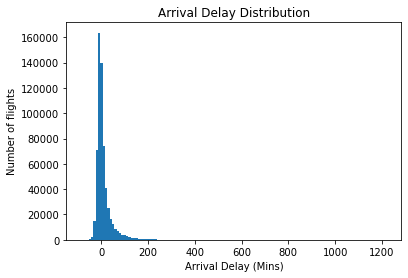

In [28]:
#plot a histogram to show the distributions of the ArrDelay variable
bins = np.arange(flights_df_clean.ArrDelay.min(), flights_df_clean.ArrDelay.max()+10, 10)
plt.title('Arrival Delay Distribution');
plt.xlabel("Arrival Delay (Mins)");
plt.ylabel("Number of flights");
plt.hist(data = flights_df_clean, x = 'ArrDelay',bins = bins);


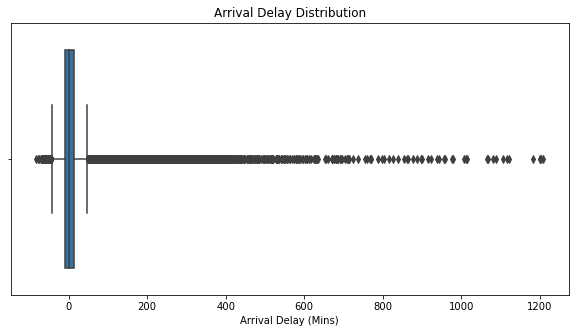

In [31]:
#plot a box plot to show the distributions and the outliers of the ArrDelay variable
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

sb.boxplot(data=flights_df_clean, x='ArrDelay', color=base_color).set(xlabel='Arrival Delay');
plt.title('Arrival Delay Distribution');
plt.xlabel("Arrival Delay (Mins)");

As mentioned before, the flight is considered delayed when it arrived 15 or more minutes than the schedule, and early arrivals show negative numbers in the dataset. The box plot above shows that there are some outliers or extreme values of the arrival delay that must be analyzed and investigated.

In [33]:
flights_df_clean.ArrDelay.describe()

count    604577.000000
mean          9.160339
std          36.282252
min         -83.000000
25%          -9.000000
50%           0.000000
75%          14.000000
max        1209.000000
Name: ArrDelay, dtype: float64

In [34]:
pd.set_option("display.max_columns", 50)
flights_df_clean[flights_df_clean.ArrDelay > 1200]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,DepartureAirport,ArrivalAirport
168235,2007,1,26,Friday,2056.0,2056,1806.0,2157,5640,N510CA,1270.0,61.0,1257.0,1209.0,0.0,258,3,10,0,0,1209,0,0,Comair Inc.,Cincinnati Northern Kentucky Intl,Capital City
433978,2007,1,30,Tuesday,1011.0,1412,1323.0,1722,738,N537US,132.0,130.0,106.0,1201.0,1199.0,788,9,17,1199,0,2,0,0,Northwest Airlines Inc.,Eagle County Regional,Minneapolis-St Paul Intl
502777,2007,1,28,Sunday,720.0,1145,1327.0,1725,1398,N4YSAA,247.0,220.0,193.0,1202.0,1175.0,1616,35,19,1162,0,27,0,13,American Airlines Inc.,Portland Intl,Dallas-Fort Worth International


After investigating the extreme values of the arrival delay, we found out that these values are wrong since the difference between the actual arrival time and the scheduled arrival time has been assigned mistakenly with wrong values.


In [35]:
#select and store the indexes in a list
indexes=flights_df_clean[flights_df_clean['ArrDelay'] > 1200].index.tolist()

#drop the rows
flights_df_clean=flights_df_clean.drop(flights_df_clean.index[indexes])

#reset indexes
flights_df_clean.reset_index(drop=True,inplace=True)

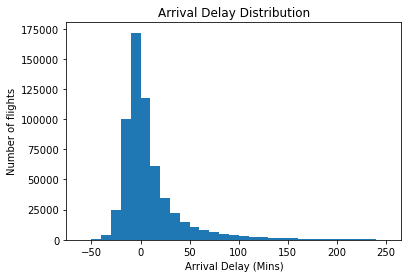

In [37]:
#plot a histogram again to show the distributions of the ArrDelayt in the limit of [-60<x<250]
bins = np.arange(-60, 260, 10)
plt.hist(data=flights_df_clean, x='ArrDelay',bins=bins);
plt.title('Arrival Delay Distribution');
plt.xlabel("Arrival Delay (Mins)");
plt.ylabel("Number of flights");


The above chart illustrates the distribution of the arrival delay variable, which is almost right-skewed. And it shows that most of the arrival delay durations are between -10 and 0.  

### Number of flights on each weekday


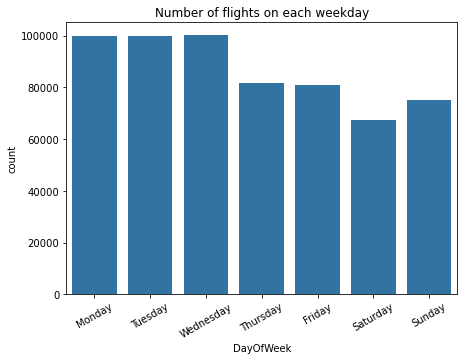

In [38]:
#plot a bar chart

base_color = sb.color_palette()[0]
plt.figure(figsize=(7,5))


sb.countplot(data=flights_df_clean,x='DayOfWeek',color=base_color);
plt.xticks(rotation=30);
plt.title('Number of flights on each weekday');


The above chart shows that the first three weekdays have almost the same number of flights, which is almost 100000, while on the last two weekdays, the number of flights is almost 80000 per day.
On the weekends the number of flights is between 60000 and 75000, so, there's a large difference between the number of flights on the weekdays and weekends.

 ### Number of flights for each airline

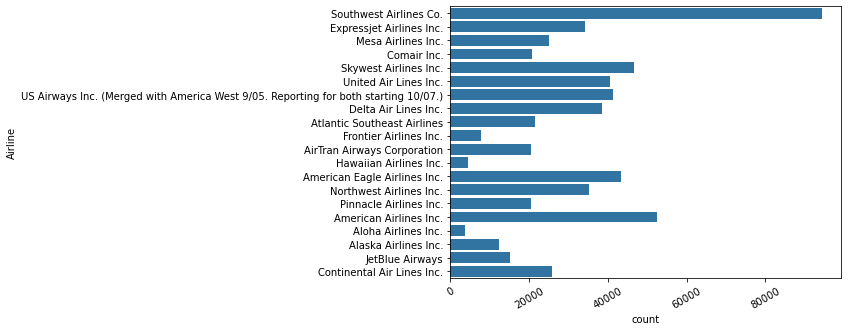

In [39]:
#plot a bar chart

base_color = sb.color_palette()[0]
plt.figure(figsize=(7,5))

sb.countplot(data=flights_df_clean,y='Airline',color=base_color);
plt.xticks(rotation=30);

In [40]:
#rename the name of US Airways
flights_df_clean['Airline'].replace(
    {"US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)": "US Airways Inc"}, 
    inplace=True)

In [41]:
#remove Inc and Co from the airline name to make the chart more readable
flights_df_clean['Airline'] = flights_df_clean['Airline'].str.replace(' Inc.*| Co.*', '', regex=True)

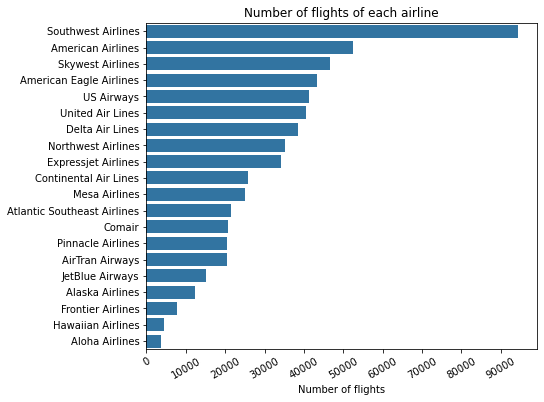

In [42]:
#replot the bar chart and order the bars descendingly 

base_color = sb.color_palette()[0]
plt.figure(figsize=(7,6))

sb.countplot(data=flights_df_clean,y='Airline',color=base_color,
             order=flights_df_clean['Airline'].value_counts().index );
#plt.xticks(rotation=30);
plt.ylabel('');
plt.xlabel('Number of flights');
plt.title('Number of flights of each airline');
plt.xticks(np.arange(0, 100000, step= 10000),rotation=30);


The above chart shows that Southwest Airlines has the largest number of flights, followed by American Airlines.

 ### Average delay time for each delay cause

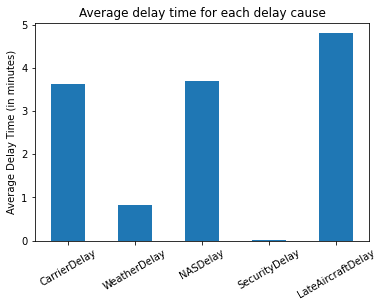

In [43]:
#plot a bar chart for the delay time of each delay cause
flights_df_clean[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().plot(kind = 'bar', color = base_color);
plt.ylabel('Average Delay Time (in minutes)');
plt.xlabel('');
plt.xticks(rotation=30);
plt.title('Average delay time for each delay cause');
plt.show()


As shown above, the Late Aircraft Delay has the longest average delay time compared to the other delay reasons. While the average delay time of the delayed arrived flights due to security is the shortest. So, we can conclude that security doesn't cause a significant impact on delays.  


### Proportion of the delayed flights

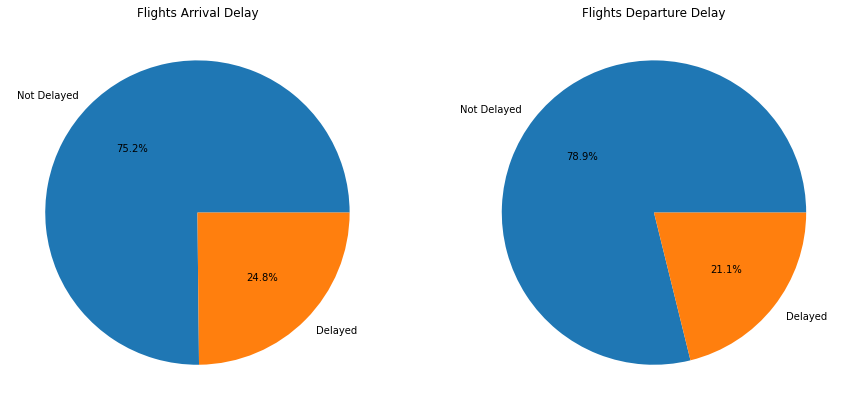

In [44]:
#add a new columns to show if the flight is delayed or not
#A flight is considered delayed when it departed or arrived 15 or more minutes than the schedule
for flight in flights_df_clean:
    flights_df_clean.loc[flights_df_clean['ArrDelay'] >= 15,'FlightArrDel'] = 'Yes'
    flights_df_clean.loc[flights_df_clean['ArrDelay'] < 15, 'FlightArrDel'] = 'No'

for flight in flights_df_clean:
    flights_df_clean.loc[flights_df_clean['DepDelay'] >= 15,'FlightDepDel'] = 'Yes'
    flights_df_clean.loc[flights_df_clean['DepDelay'] < 15, 'FlightDepDel'] = 'No'

#plot two pie charts to illustrates the percentage of the arrival delayed flights and departure delayed flights
f,ax=plt.subplots(1,2,figsize=(15,10))
plt1=flights_df_clean['FlightArrDel'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],labels=['Not Delayed','Delayed'],
                                           textprops={'fontsize': 10})
plt1.set_ylabel('')
plt1.set_title('Flights Arrival Delay')

plt2=flights_df_clean['FlightDepDel'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],labels=['Not Delayed','Delayed'],
                                           textprops={'fontsize': 10})
plt2.set_ylabel('')
plt2.set_title('Flights Departure Delay')

plt.show()

The first pie chart illustrates that 24% of the flights experienced a delay in the arrival time. And the second pie chart shows that the departure of 21.1% of the flights was delayed in Jan 2007.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


>The distributions of the arrival delay variable and the departure delay variable are almost right-skewed. And most of the arrival delay durations and departure delay durations are between -10 and 10.

>Moreover, two variables have been added to the data frame to indicate if the flight arrival or departure time was delayed or not. We used the two variables to illustrate the proportion of the delayed flights in Jan 2007.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  Departure Delay and Arrival Delay variables had outliers. After investigating some of the outliers, we found out that these values are wrong since the difference between the actual arrival or departure time and the scheduled arrival or departure time has been assigned mistakenly with incorrect values. So, we dropped these rows that represent the outlier points.


## Bivariate Exploration

> In this section, we will investigate the relationships between pairs of variables in our dataset

### Correlation between numeric variables 


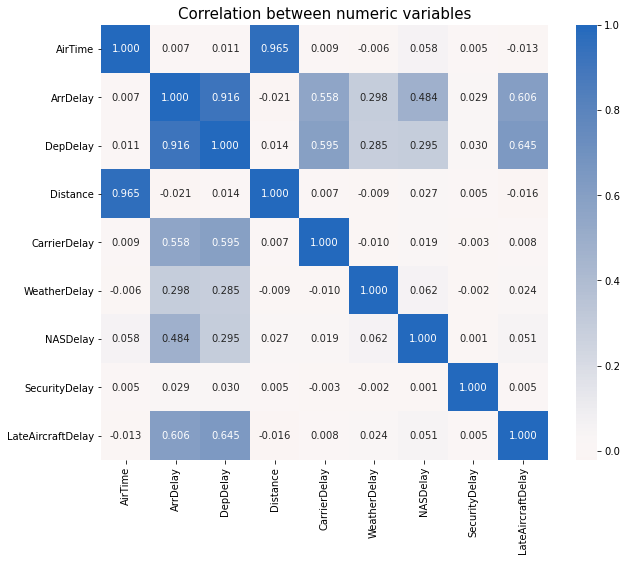

In [48]:
#select the numeric variables that will help us to investigate the relationship between the variables 
numeric_variables = ['AirTime','ArrDelay','DepDelay','Distance','CarrierDelay','WeatherDelay',
               'NASDelay','SecurityDelay','LateAircraftDelay']

#correlation plot to show the correlation between numeric variables
plt.figure(figsize = [10, 8])
sb.heatmap(flights_df_clean[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between numeric variables',fontsize=15)

plt.show()

As expected, the above correlation plot shows that the arrival delay and departure delay variables are strongly correlated, and the distance and air time variables are strongly correlated as well.

### Relationship between arrival delay and departure delay 

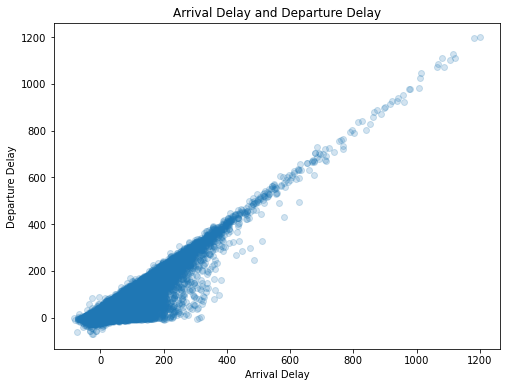

In [50]:
plt.figure(figsize = [8, 6])

plt.scatter(data = flights_df_clean, x = 'ArrDelay', y = 'DepDelay', alpha=0.2);
plt.xlabel("Arrival Delay");
plt.ylabel("Departure Delay");
plt.title('Arrival Delay and Departure Delay');


The above scatter plot illustrates the proportional relationship between arrival delay and departure delay, which is the expected relationship since departure delay will cause an arrival delay as well. And most of the data falls between 0 minutes to 400 minutes.

### Average arrival and departure delay on each weekday

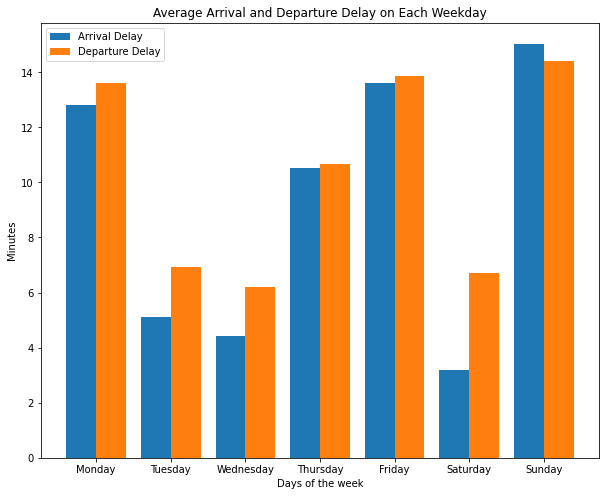

In [52]:
new_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
             'Friday','Saturday','Sunday']

new_df1=flights_df_clean.groupby('DayOfWeek').mean()['ArrDelay']
new_df1.reindex(new_index)

new_df2=flights_df_clean.groupby('DayOfWeek').mean()['DepDelay']
new_df2.reindex(new_index)

indexes = np.arange(7) 
bar_width = 0.4       

plt.figure(figsize = [10, 8])

plt.bar(indexes, new_df1.reindex(new_index), bar_width, label='Arrival Delay')
plt.bar(indexes + bar_width, new_df2.reindex(new_index), bar_width, label='Departure Delay')

plt.ylabel('Minutes')
plt.title('Average Arrival and Departure Delay on Each Weekday')

plt.xticks(indexes + bar_width / 2, new_index)
plt.legend(loc='best')
plt.xlabel('Days of the week')
plt.show();


The above bar chart shows that Sunday has the longest arrival and departure delay time average, and Saturday has the shortest arrival delay time average, while Wednesday has the shortest departure delay time.

The above chart that illustrate the average departure and arrival delay on weekday and weekend show that the best two days to fly in are Saturday and Wednesday, and the worst two days to fly in are Sunday and Friday.

### Average arrival delay on each arrival airport


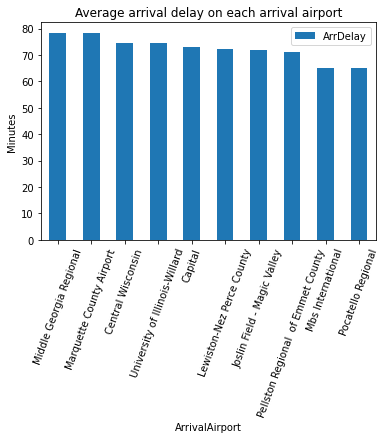

In [55]:
#select only delayed flights
delay_df=flights_df_clean[(flights_df_clean['FlightDepDel']=='Yes')|(flights_df_clean['FlightArrDel']=='Yes')]

#plot a bar chart for the arrival delay on each airport
delay_df.groupby('ArrivalAirport').agg({'ArrDelay':'mean'}).sort_values(by='ArrDelay',ascending=False).head(10).plot.bar();
plt.xticks(rotation=70);
plt.ylabel('Minutes')
plt.title('Average arrival delay on each arrival airport')

plt.show()

The above chart illustrates the first ten arrival airports that have the longest arrival delay time. 

### Average departure delay on each departure airport


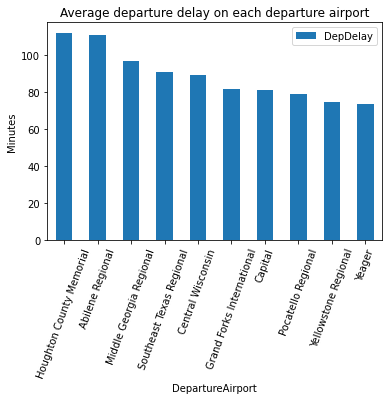

In [56]:
#select only delayed flights
delay_df=flights_df_clean[(flights_df_clean['FlightDepDel']=='Yes')|(flights_df_clean['FlightArrDel']=='Yes')]

#plot a bar chart for the departure delay on each airport
delay_df.groupby('DepartureAirport').agg({'DepDelay':'mean'}).sort_values(by='DepDelay',ascending=False).head(10).plot.bar();
plt.xticks(rotation=70);
plt.ylabel('Minutes')
plt.title('Average departure delay on each departure airport')
plt.show()

The above chart illustrates the first ten departure airports that have the longest departure delay time. 

### Average departure delay time for each cause on each airport


The following plots will show the first ten departure airports with the longest average delay time for each delay cause. 

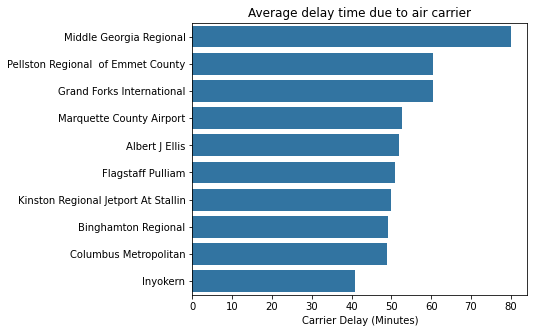

In [58]:
#plot a bar chart for avg delay time of flights delayed due to air carrier, e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.
dep_airport=delay_df.groupby('DepartureAirport').CarrierDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('DepartureAirport').CarrierDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Carrier Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to air carrier');

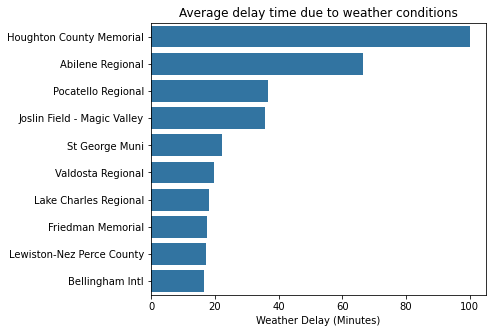

In [59]:
#plot a bar chart for avg delay time of flights delayed due to weather conditions
dep_airport=delay_df.groupby('DepartureAirport').WeatherDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('DepartureAirport').WeatherDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Weather Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to weather conditions');

The Houghton County Memorial Airport, located in the State of Michigan, has the longest delay average due to weather conditions. The difference in numbers is significant compared to the other airports, the reason for that might be the location of the airport since the state of Michigan usually gets affected by weather conditions during the winter. (since only the data of Jan has been extracted)

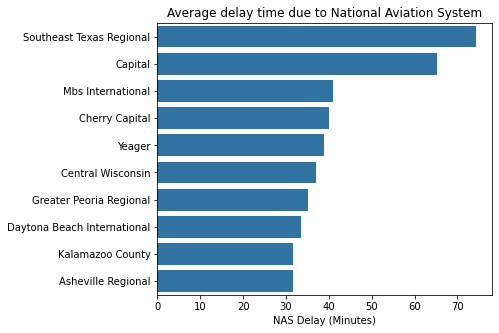

In [61]:
#plot a bar chart for avg delay time of flights delayed due to National Aviation System
dep_airport=delay_df.groupby('DepartureAirport').NASDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('DepartureAirport').NASDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("NAS Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to National Aviation System');

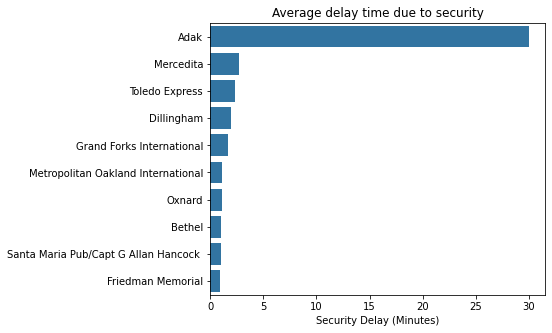

In [62]:
#plot a bar chart for avg delay time of flights delayed due to security, e.g. evacuation of a terminal or concourse
dep_airport=delay_df.groupby('DepartureAirport').SecurityDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('DepartureAirport').SecurityDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Security Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to security');

It seems that security is not the main reason for a flight departure delay for all airports except Adak Airport, which has an average of more than 25 minutes.  

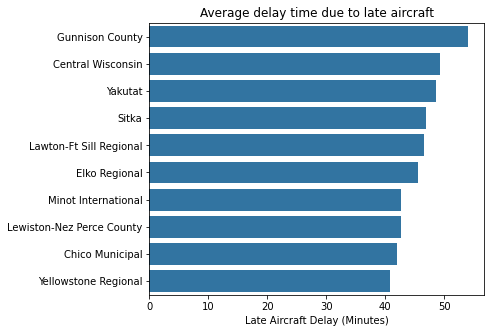

In [64]:
#plot a bar chart for avg delay time of flights delayed due to a previous flight using the same aircraft being late
dep_airport=delay_df.groupby('DepartureAirport').LateAircraftDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('DepartureAirport').LateAircraftDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Late Aircraft Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to late aircraft');

### Average arrival delay time for each cause on each airport


The following plots will show the first ten arrival airports with the longest average delay time for each delay cause. 

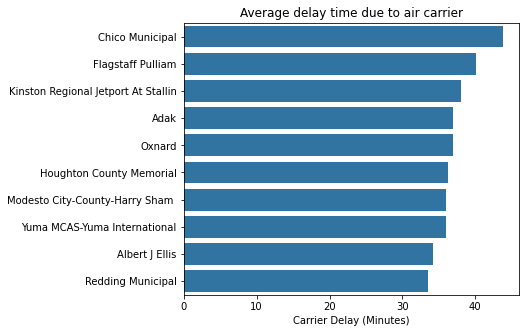

In [69]:
#plot a bar chart for avg delay time of flights delayed due to air carrier, e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.
dep_airport=delay_df.groupby('ArrivalAirport').CarrierDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('ArrivalAirport').CarrierDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Carrier Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to air carrier');

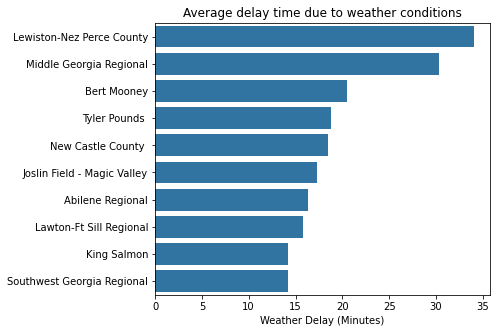

In [68]:
#plot a bar chart for avg delay time of flights delayed due to weather conditions
dep_airport=delay_df.groupby('ArrivalAirport').WeatherDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('ArrivalAirport').WeatherDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Weather Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to weather conditions');

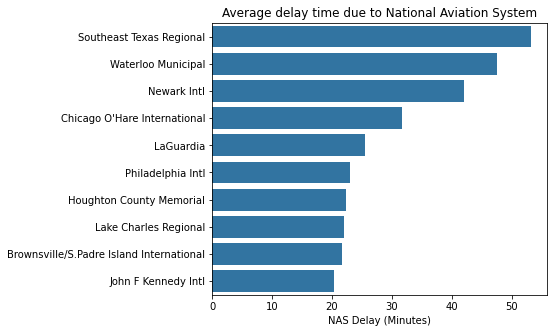

In [67]:
#plot a bar chart for avg delay time of flights delayed due to National Aviation System
dep_airport=delay_df.groupby('ArrivalAirport').NASDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('ArrivalAirport').NASDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("NAS Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to National Aviation System');

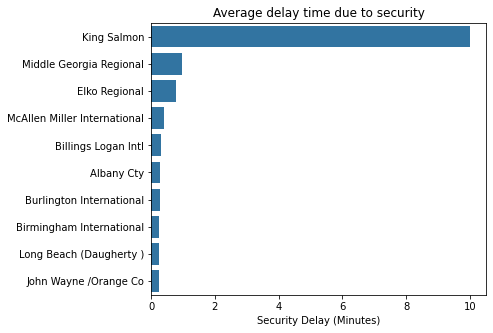

In [66]:
#plot a bar chart for avg delay time of flights delayed due to security, e.g. evacuation of a terminal or concourse
dep_airport=delay_df.groupby('ArrivalAirport').SecurityDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('ArrivalAirport').SecurityDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Security Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to security');

Security is not the main reason for a flight arrival delay for all airports except King Salmon Airport, which has an average of more than 8 minutes.  

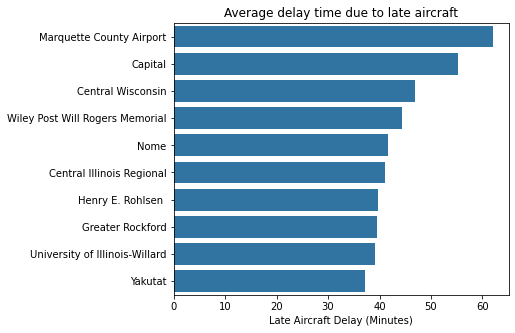

In [65]:
#plot a bar chart for avg delay time of flights delayed due to a previous flight using the same aircraft being late
dep_airport=delay_df.groupby('ArrivalAirport').LateAircraftDelay.mean().sort_values(ascending=False).head(10).index
avg_del=delay_df.groupby('ArrivalAirport').LateAircraftDelay.mean().sort_values(ascending=False).head(10)
base_color = sb.color_palette()[0]
plt.figure(figsize = [6, 5])

sb.barplot(x=avg_del
           ,y=dep_airport,
               color=base_color);
plt.xlabel("Late Aircraft Delay (Minutes)");
plt.ylabel("");
plt.title('Average delay time due to late aircraft');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected, the arrival delay and departure delay variables are strongly correlated, and the distance and air time variables are strongly correlated as well.

>For the average delay of each day, Sunday has the longest delay time in arrival and departure. And the day that has the shortest departure delay is Wednesday, while Saturday has the shortest arrival delay. 

>Adak Airport and King Salmon Airport had the highest avg delay time due to security, even though that security didn't affect all other airports. 

>The three airports with the highest average delay time due to late aircraft are Marquette County Airport, Capital, and Central Wisconsin, which are also from the top 10 airports with the highest delay time average. So, we can conclude that late aircraft has a huge impact on the overall arrival delay time.

 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>The correlation plot shows that the relationship between the flights delayed duo to National Aviation System and the arrival delay is stronger than its relationship with departure delay, unlike the other delay reasons, which almost had the same correlations in departure and arrival.

## Multivariate Exploration

>In this section, we will investigations the data and visualize it using more than two variables

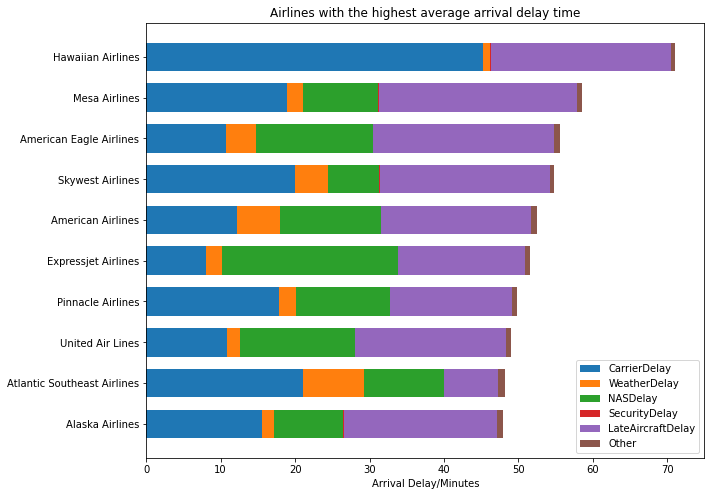

In [934]:
import matplotlib.pyplot as plt
%matplotlib inline  

#select only delayed flights
delay_df=flights_df_clean[(flights_df_clean['FlightDepDel']=='Yes')|(flights_df_clean['FlightArrDel']=='Yes')]

#group by the airline and sort by arrival delay
plot=delay_df.groupby('Airline')[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','ArrDelay']].mean().reset_index().set_index('Airline').sort_values(by='ArrDelay', ascending=False).head(10)

#sum up all delay causes and store them in a new temporary column 
plot['sum'] = plot['CarrierDelay'] + plot['WeatherDelay'] + plot['NASDelay'] + plot['SecurityDelay'] + plot['LateAircraftDelay']

#subtract the sum of delay causes from the arrival delay to get the "other reasons delay time"
plot['Other'] = plot['ArrDelay'] - plot['sum']
plot.drop(columns = ['sum','ArrDelay'],inplace=True)

plot = plot.iloc[::-1]
    

CarrierDel = plot['CarrierDelay']
WeatherDel = plot['WeatherDelay']
NASDel = plot['NASDelay']
SecurityDel = plot['SecurityDelay']
LateAircraftDel = plot['LateAircraftDelay']
ArrivalDel=plot['Other']
 

indexes = np.arange(10)    
width = 0.7       
    
plt.figure(figsize = [10, 8])
part1 = plt.barh(indexes, CarrierDel, width)
part2 = plt.barh(indexes, WeatherDel, width, left=CarrierDel)
part3 = plt.barh(indexes, NASDel, width, left=WeatherDel+CarrierDel)
part4 = plt.barh(indexes, SecurityDel, width, left=WeatherDel+CarrierDel+NASDel)
part5 = plt.barh(indexes, LateAircraftDel, width, left=WeatherDel+CarrierDel+NASDel+SecurityDel)
part6= plt.barh(indexes, ArrivalDel, width, left=WeatherDel+CarrierDel+NASDel+SecurityDel+LateAircraftDel)

plt.xlabel('Arrival Delay/Minutes')
plt.title('Airlines with the highest average arrival delay time')
plt.yticks(indexes, plot.index)
plt.xticks(np.arange(0, 80, 10))
plt.legend((part1[0], part2[0], part3[0], part4[0], part5[0],part6[6]), plot.columns, loc='lower right')

plt.xlim([0,75]);
plt.show()    

The bar chart above shows the top ten airlines with the highest average of arrival delay time, each bar represents the average arrival delay, and the delay time of each cause illustrated on each bar. ('Other' is the difference between avg arrival delay and the sum of reasons delay averages)

From the above chart, we can conclude that Hawaiian Airlines is the worst airline to fly on since it has the highest average arrival delay time.
Most of the Hawaiian Airlines flights are delayed due to air carriers, e.g, maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc. And that can be an indicator of the airline's low performance.

The most effective two causes that affect the flights' arrival and cause a delay are the air carrier and late aircraft (previous flight using the same aircraft being late).

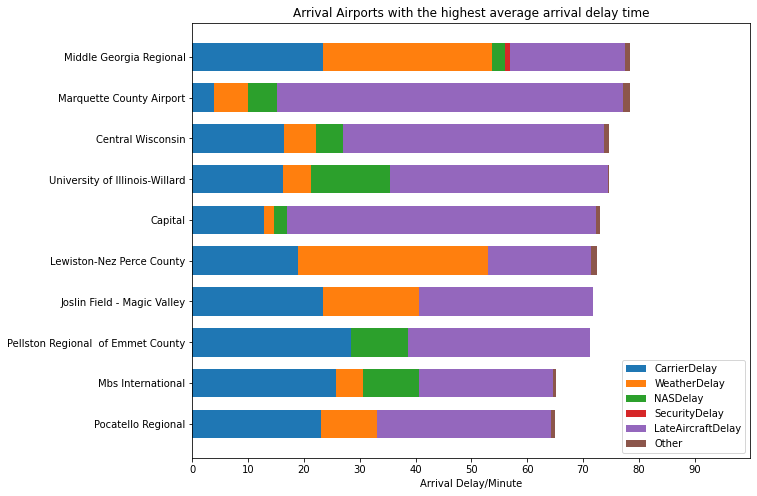

In [935]:
#select only delayed flights
delay_df=flights_df_clean[(flights_df_clean['FlightDepDel']=='Yes')|(flights_df_clean['FlightArrDel']=='Yes')]

#group by arrival airport and sort by aarrival delay
plot=delay_df.groupby('ArrivalAirport')[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','ArrDelay']].mean().sort_values(by='ArrDelay', ascending=False).head(10)


#sum up all delay causes and store them in a new temporary column 
plot['sum'] = plot['CarrierDelay'] + plot['WeatherDelay'] + plot['NASDelay'] + plot['SecurityDelay'] + plot['LateAircraftDelay']

#subtract the sum of delay causes from the arrival delay to get the "other reasons delay time"
plot['Other'] = plot['ArrDelay'] - plot['sum']
plot.drop(columns = ['sum','ArrDelay'],inplace=True)

plot = plot.iloc[::-1]
    

CarrierDel = plot['CarrierDelay']
WeatherDel = plot['WeatherDelay']
NASDel = plot['NASDelay']
SecurityDel = plot['SecurityDelay']
LateAircraftDel = plot['LateAircraftDelay']
ArrivalDel=plot['Other']
 

indexes = np.arange(10)    
width = 0.7       
    
plt.figure(figsize = [10, 8])
part1 = plt.barh(indexes, CarrierDel, width)
part2 = plt.barh(indexes, WeatherDel, width, left=CarrierDel)
part3 = plt.barh(indexes, NASDel, width, left=WeatherDel+CarrierDel)
part4 = plt.barh(indexes, SecurityDel, width, left=WeatherDel+CarrierDel+NASDel)
part5 = plt.barh(indexes, LateAircraftDel, width, left=WeatherDel+CarrierDel+NASDel+SecurityDel)
part6= plt.barh(indexes, ArrivalDel, width, left=WeatherDel+CarrierDel+NASDel+SecurityDel+LateAircraftDel)

plt.xlabel('Arrival Delay/Minute')
plt.title('Arrival Airports with the highest average arrival delay time')
plt.yticks(indexes, plot.index)
plt.xticks(np.arange(0, 100, 10))
plt.legend((part1[0], part2[0], part3[0], part4[0], part5[0],part6[6]), plot.columns, loc='lower right')

plt.xlim([0,100]);
plt.show()    

The worst two airports to fly in are Middle Georgia Regional Airport and Marquette County Airport. They have the longest delay time due to different causes.                                                      

The Middle Georgia Regional Airport and Lewiston Nez Perce County Airport got affected by weather conditions more than the other ten airports that have the longest delay time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The bar charts above shows the top ten airlines and airport with the highest average of arrival delay time, each bar represents the average arrival delay, and the delay time of each cause illustrated on each bar. 
The charts show that The most effective two causes that affect the flights' arrival and cause a delay are the air carrier and late aircraft (previous flight using the same aircraft being late).

### Were there any interesting or surprising interactions between features?

Surprisingly, security didn't cause an arrival delay for all airlines and airports with the highest delay averages. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!